# 2 - Ex 2 graphs
Our data takes to long to run, so we save all the data and create the graphs afterwards.

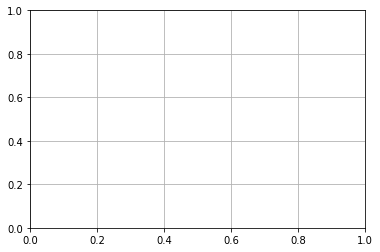

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
plt.grid(True)
plt.style.use('fivethirtyeight')

import os

folder = os.getcwd()
data = np.load(os.path.join(folder, "r-norm-210624-191625.npy"))
data_log = np.load(os.path.join(folder, "r-lognorm-210624-224151.npy"))

target_surface = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
locations = [50, 100, 200, 500]
scales = [1, 5, 10, 20]
mus = [4, 5, 6, 7, 8]
sigmas = [0.2, 0.5, 0.8, 1]

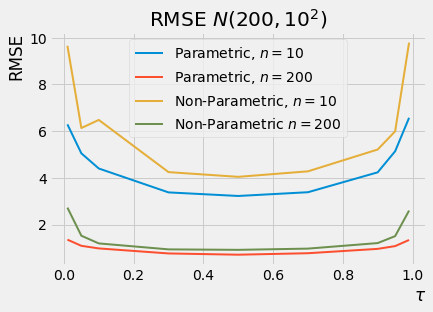

In [5]:
def rmse_old(location_index, scale_index):
    rmse_quo_10 = np.zeros(len(target_surface))
    rmse_quo_50 = np.zeros(len(target_surface))
    rmse_quo_100 = np.zeros(len(target_surface))
    rmse_quo_200 = np.zeros(len(target_surface))

    for i, t in enumerate(target_surface):
        rsme_par_10 = data[location_index][scale_index][0][i][0][0]
        rsme_non_10 = data[location_index][scale_index][0][i][1][0]
        rmse_quo_10[i] = rsme_par_10

        rsme_par_200 = data[location_index][scale_index][3][i][0][0]
        rsme_non_200 = data[location_index][scale_index][3][i][1][0]
        rmse_quo_50[i] = rsme_par_200

        rsme_par_10 = data[location_index][scale_index][0][i][0][0]
        rsme_non_10 = data[location_index][scale_index][0][i][1][0]
        rmse_quo_100[i] = rsme_non_10

        rsme_par_200 = data[location_index][scale_index][3][i][0][0]
        rsme_non_200 = data[location_index][scale_index][3][i][1][0]
        rmse_quo_200[i] = rsme_non_200

    plt.plot(target_surface, rmse_quo_10, lw=2)
    plt.plot(target_surface, rmse_quo_50, lw=2)
    plt.plot(target_surface, rmse_quo_100, lw=2)
    plt.plot(target_surface, rmse_quo_200, lw=2)
    plt.legend(["Parametric, $n = 10$", "Parametric, $n = 200$", "Non-Parametric, $n = 10$", "Non-Parametric $n = 200$"])
    plt.title(f"RMSE $N({locations[location_index]}, {scales[scale_index]}^2)$")
    plt.xlabel("$\\tau$", loc="right")
    plt.ylabel("RMSE", loc="top")
    plt.show()

rmse_old(2, 2)

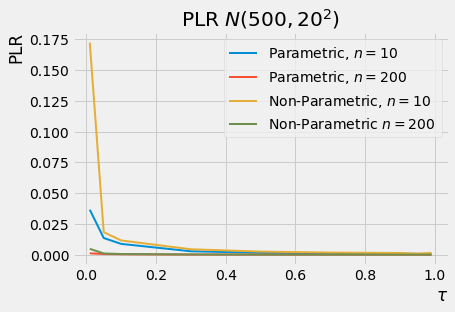

In [9]:
def plr_old(location_index, scale_index):
    rmse_quo_10 = np.zeros(len(target_surface))
    rmse_quo_50 = np.zeros(len(target_surface))
    rmse_quo_100 = np.zeros(len(target_surface))
    rmse_quo_200 = np.zeros(len(target_surface))

    for i, t in enumerate(target_surface):
        rsme_par_10 = data[location_index][scale_index][0][i][0][1]
        rsme_non_10 = data[location_index][scale_index][0][i][1][1]
        rmse_quo_10[i] = rsme_par_10

        rsme_par_200 = data[location_index][scale_index][3][i][0][1]
        rsme_non_200 = data[location_index][scale_index][3][i][1][1]
        rmse_quo_50[i] = rsme_par_200

        rsme_par_10 = data[location_index][scale_index][0][i][0][1]
        rsme_non_10 = data[location_index][scale_index][0][i][1][1]
        rmse_quo_100[i] = rsme_non_10

        rsme_par_200 = data[location_index][scale_index][3][i][0][1]
        rsme_non_200 = data[location_index][scale_index][3][i][1][1]
        rmse_quo_200[i] = rsme_non_200

    plt.plot(target_surface, rmse_quo_10, lw=2)
    plt.plot(target_surface, rmse_quo_50, lw=2)
    plt.plot(target_surface, rmse_quo_100, lw=2)
    plt.plot(target_surface, rmse_quo_200, lw=2)
    plt.legend(["Parametric, $n = 10$", "Parametric, $n = 200$", "Non-Parametric, $n = 10$", "Non-Parametric $n = 200$"])
    plt.title(f"PLR $N({locations[location_index]}, {scales[scale_index]}^2)$")
    plt.xlabel("$\\tau$", loc="right")
    plt.ylabel("PLR", loc="top")
    plt.show()

plr_old(3, 3)

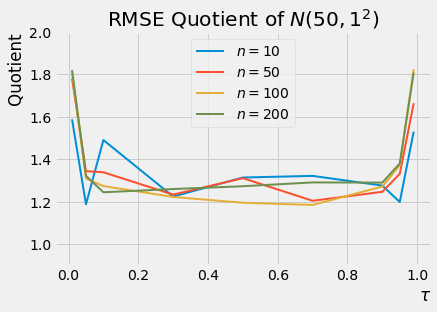

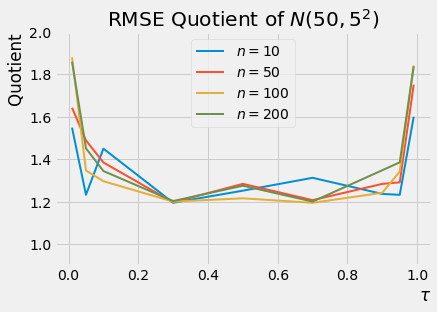

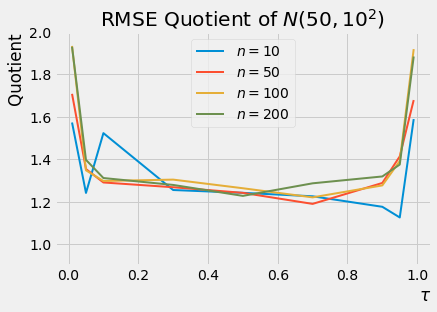

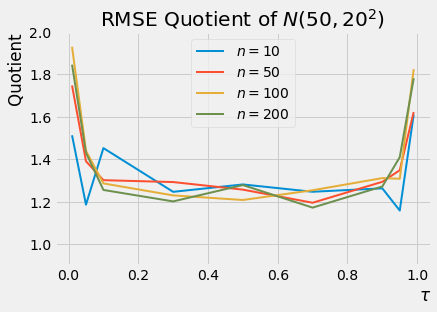

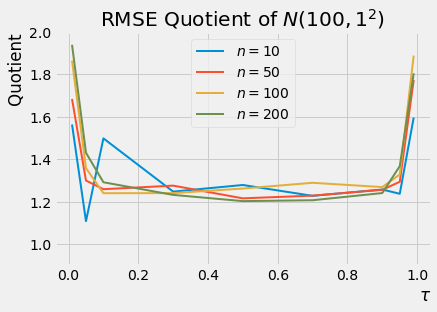

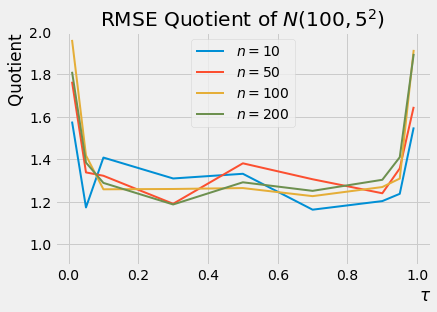

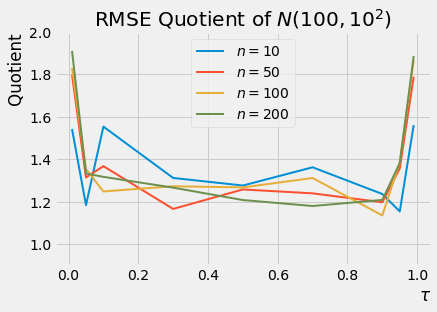

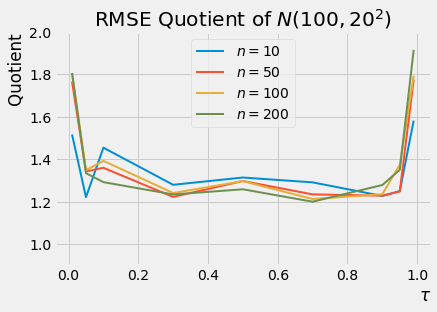

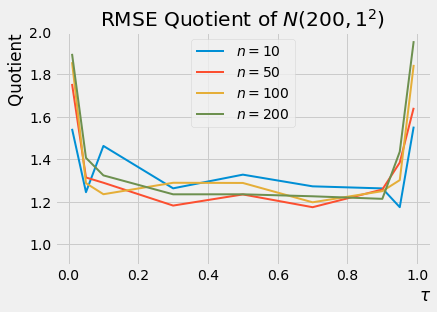

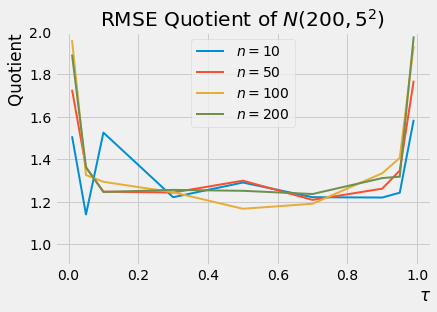

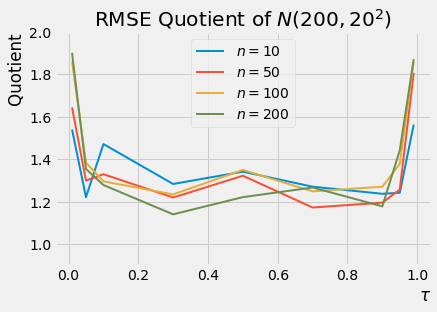

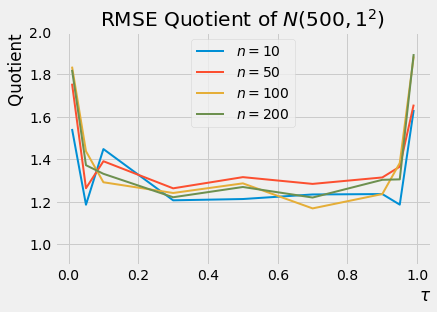

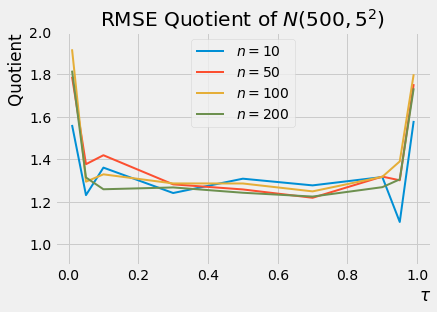

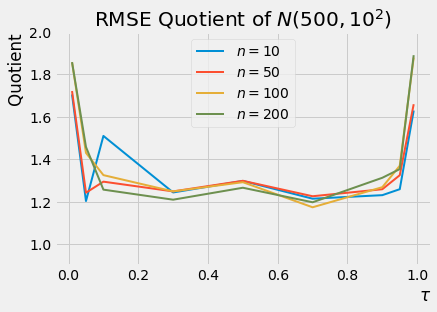

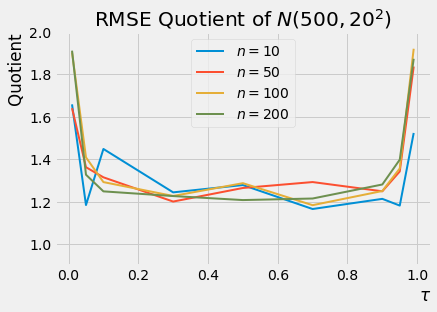

In [2]:
def rmse(location_index, scale_index):
    rmse_quo_10 = np.zeros(len(target_surface))
    rmse_quo_50 = np.zeros(len(target_surface))
    rmse_quo_100 = np.zeros(len(target_surface))
    rmse_quo_200 = np.zeros(len(target_surface))

    for i, t in enumerate(target_surface):
        rsme_par_10 = data[location_index][scale_index][0][i][0][0]
        rsme_non_10 = data[location_index][scale_index][0][i][1][0]
        rmse_quo_10[i] = rsme_non_10/rsme_par_10
    
        rsme_par_50 = data[location_index][scale_index][1][i][0][0]
        rsme_non_50 = data[location_index][scale_index][1][i][1][0]
        rmse_quo_50[i] = rsme_non_50/rsme_par_50
    
        rsme_par_100 = data[location_index][scale_index][2][i][0][0]
        rsme_non_100 = data[location_index][scale_index][2][i][1][0]
        rmse_quo_100[i] = rsme_non_100/rsme_par_100

        rsme_par_200 = data[location_index][scale_index][3][i][0][0]
        rsme_non_200 = data[location_index][scale_index][3][i][1][0]
        rmse_quo_200[i] = rsme_non_200/rsme_par_200

    plt.plot(target_surface, rmse_quo_10, lw=2)
    plt.plot(target_surface, rmse_quo_50, lw=2)
    plt.plot(target_surface, rmse_quo_100, lw=2)
    plt.plot(target_surface, rmse_quo_200, lw=2)
    plt.ylim([0.9, 2])
    plt.legend(["$n = 10$", "$n = 50$", "$n = 100$", "$n = 200$"])
    plt.title(f"RMSE Quotient of $N({locations[location_index]}, {scales[scale_index]}^2)$")
    plt.xlabel("$\\tau$", loc="right")
    plt.ylabel("Quotient", loc="top")
    plt.show()

for i in range(4):
    for j in range(4):
        rmse(i, j)

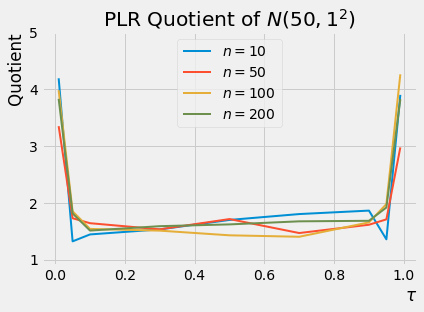

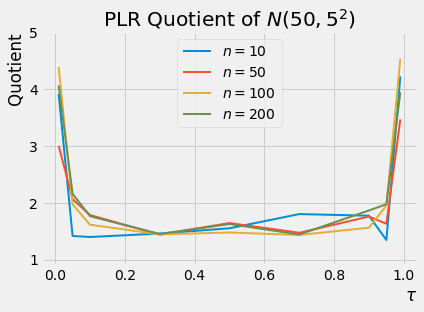

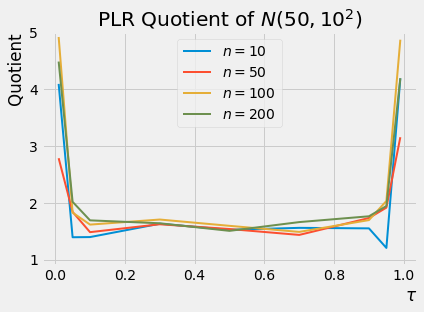

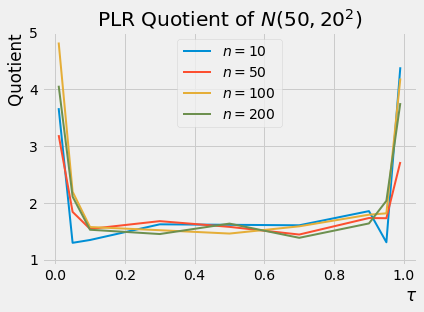

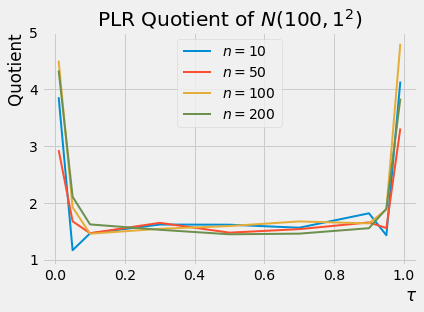

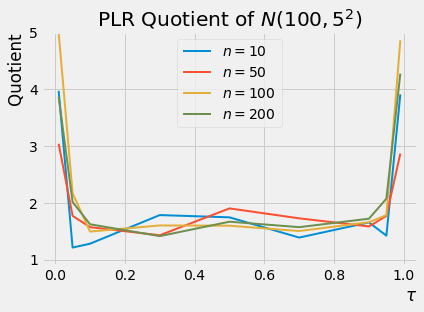

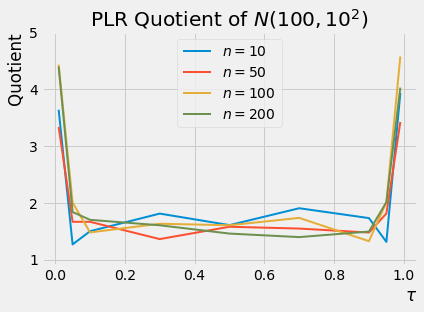

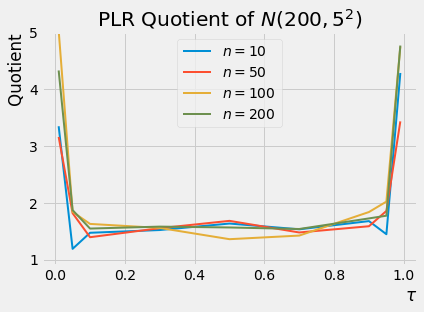

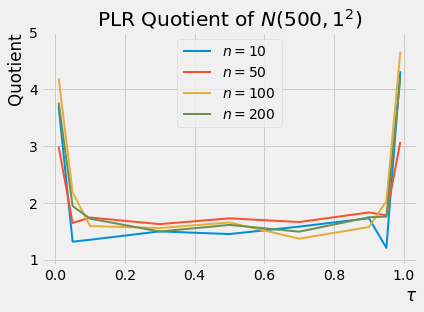

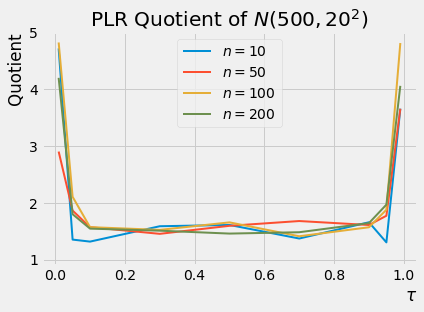

In [3]:
def plr(location_index, scale_index):
    plr_quo_10 = np.zeros(len(target_surface))
    plr_quo_50 = np.zeros(len(target_surface))
    plr_quo_100 = np.zeros(len(target_surface))
    plr_quo_200 = np.zeros(len(target_surface))

    for i, t in enumerate(target_surface):
        plr_par_10 = data[location_index][scale_index][0][i][0][1]
        plr_non_10 = data[location_index][scale_index][0][i][1][1]
        plr_quo_10[i] = plr_non_10/plr_par_10
    
        plr_par_50 = data[location_index][scale_index][1][i][0][1]
        plr_non_50 = data[location_index][scale_index][1][i][1][1]
        plr_quo_50[i] = plr_non_50/plr_par_50
    
        plr_par_100 = data[location_index][scale_index][2][i][0][1]
        plr_non_100 = data[location_index][scale_index][2][i][1][1]
        plr_quo_100[i] = plr_non_100/plr_par_100

        plr_par_200 = data[location_index][scale_index][3][i][0][1]
        plr_non_200 = data[location_index][scale_index][3][i][1][1]
        plr_quo_200[i] = plr_non_200/plr_par_200

    plt.plot(target_surface, plr_quo_10, lw=2)
    plt.plot(target_surface, plr_quo_50, lw=2)
    plt.plot(target_surface, plr_quo_100, lw=2)
    plt.plot(target_surface, plr_quo_200, lw=2)
    plt.ylim([0.9, 5])
    plt.legend(["$n = 10$", "$n = 50$", "$n = 100$", "$n = 200$"])
    plt.title(f"PLR Quotient of $N({locations[location_index]}, {scales[scale_index]}^2)$")
    plt.xlabel("$\\tau$", loc="right")
    plt.ylabel("Quotient", loc="top")
    plt.show()

for i in range(4):
    for j in range(4):
        plr(i, j)

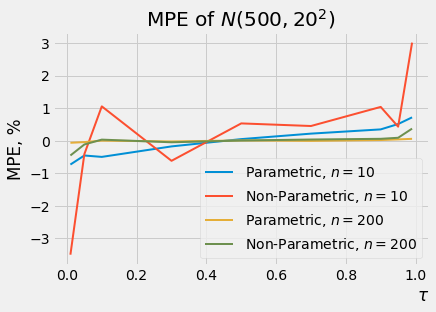

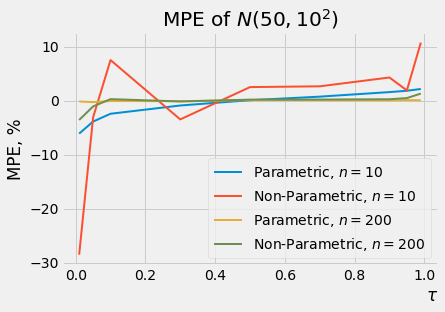

In [4]:
def mpe(location_index, scale_index):
    target_surface = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
    mpe_par_10 = np.zeros(len(target_surface))
    mpe_non_10 = np.zeros(len(target_surface))
    mpe_par_200 = np.zeros(len(target_surface))
    mpe_non_200 = np.zeros(len(target_surface))

    for i, t in enumerate(target_surface):
        mpe_par_10[i] = data[location_index][scale_index][0][i][0][2]
        mpe_non_10[i] = data[location_index][scale_index][0][i][1][2]
        mpe_par_200[i] = data[location_index][scale_index][3][i][0][2]
        mpe_non_200[i] = data[location_index][scale_index][3][i][1][2]

    plt.plot(target_surface, mpe_par_10, lw=2)
    plt.plot(target_surface, mpe_non_10, lw=2)
    plt.plot(target_surface, mpe_par_200, lw=2)
    plt.plot(target_surface, mpe_non_200, lw=2)
    plt.legend(["Parametric, $n = 10$", "Non-Parametric, $n = 10$", "Parametric, $n = 200$", "Non-Parametric, $n = 200$"])
    plt.title(f"MPE of $N({locations[location_index]}, {scales[scale_index]}^2)$")
    plt.xlabel("$\\tau$", loc="right")
    plt.ylabel("MPE, %")
    plt.show()
mpe(3, 3)
mpe(0, 2)

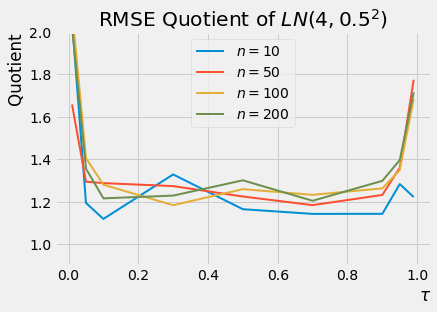

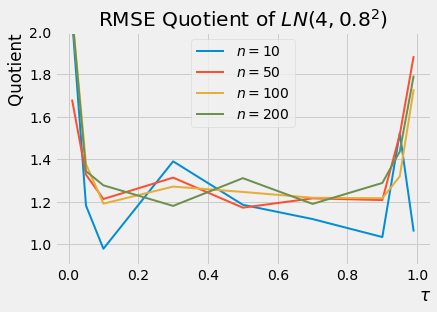

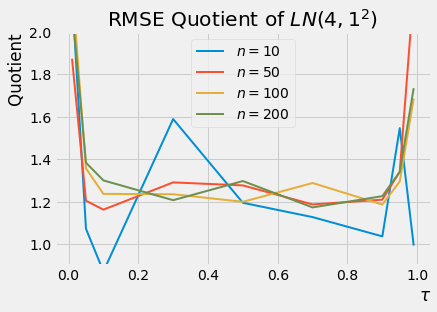

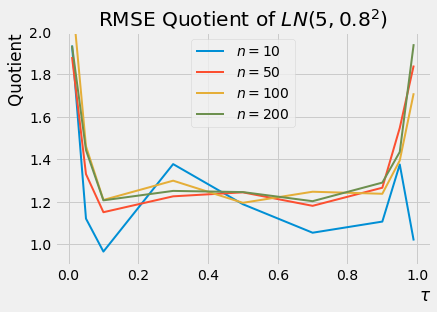

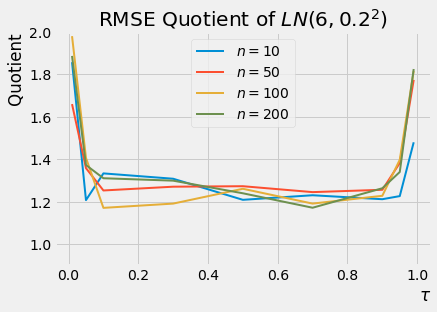

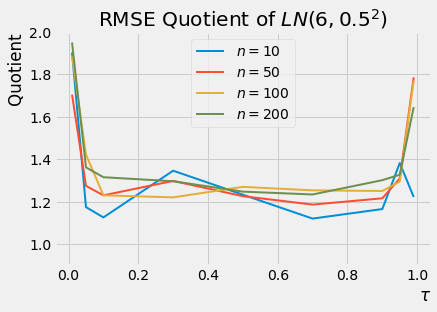

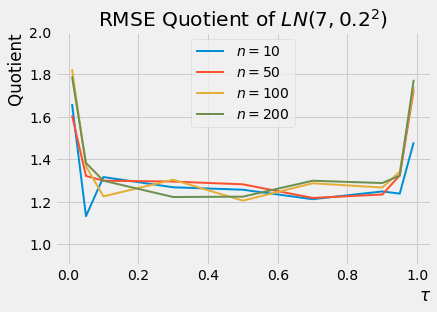

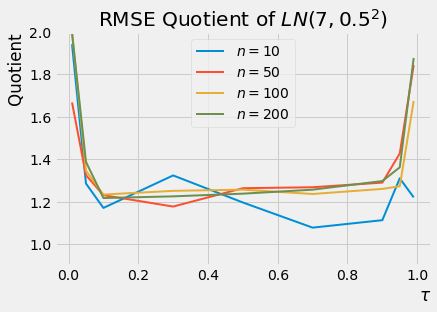

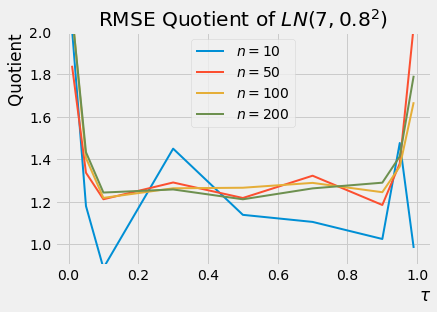

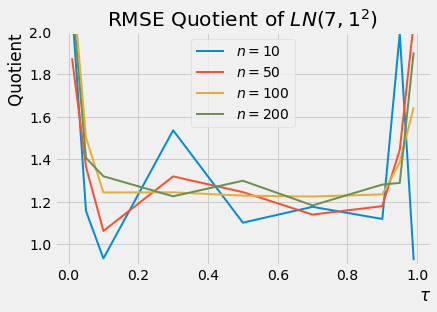

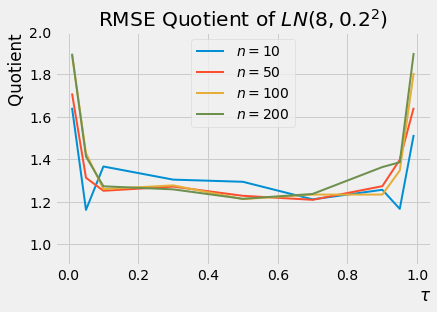

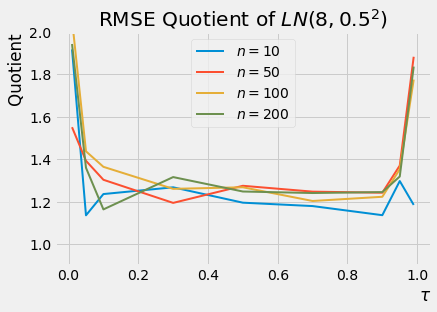

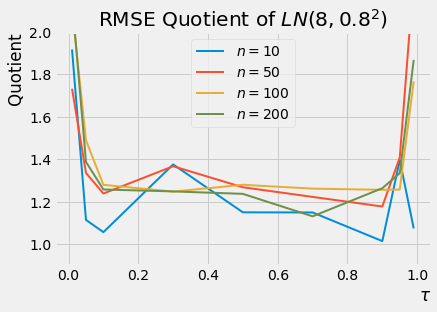

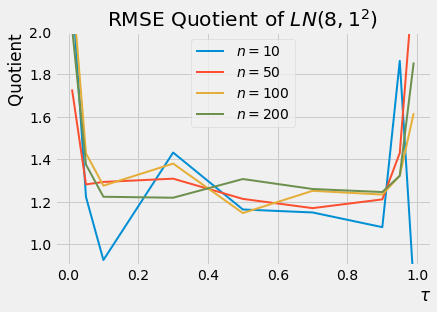

In [5]:
def rmse_log(mu_index, sigma_index):
    rmse_quo_10 = np.zeros(len(target_surface))
    rmse_quo_50 = np.zeros(len(target_surface))
    rmse_quo_100 = np.zeros(len(target_surface))
    rmse_quo_200 = np.zeros(len(target_surface))

    for i, t in enumerate(target_surface):
        rsme_par_10 = data_log[mu_index][sigma_index][0][i][0][0]
        rsme_non_10 = data_log[mu_index][sigma_index][0][i][1][0]
        rmse_quo_10[i] = rsme_non_10/rsme_par_10
    
        rsme_par_50 = data_log[mu_index][sigma_index][1][i][0][0]
        rsme_non_50 = data_log[mu_index][sigma_index][1][i][1][0]
        rmse_quo_50[i] = rsme_non_50/rsme_par_50
    
        rsme_par_100 = data_log[mu_index][sigma_index][2][i][0][0]
        rsme_non_100 = data_log[mu_index][sigma_index][2][i][1][0]
        rmse_quo_100[i] = rsme_non_100/rsme_par_100

        rsme_par_200 = data_log[mu_index][sigma_index][3][i][0][0]
        rsme_non_200 = data_log[mu_index][sigma_index][3][i][1][0]
        rmse_quo_200[i] = rsme_non_200/rsme_par_200

    plt.plot(target_surface, rmse_quo_10, lw=2)
    plt.plot(target_surface, rmse_quo_50, lw=2)
    plt.plot(target_surface, rmse_quo_100, lw=2)
    plt.plot(target_surface, rmse_quo_200, lw=2)
    plt.ylim([0.9, 2])
    plt.legend(["$n = 10$", "$n = 50$", "$n = 100$", "$n = 200$"])
    plt.title(f"RMSE Quotient of $LN({mus[mu_index]}, {sigmas[sigma_index]}^2)$")
    plt.xlabel("$\\tau$", loc="right")
    plt.ylabel("Quotient", loc="top")
    plt.show()

for i in range(5):
    for j in range(4):
        rmse_log(i, j)

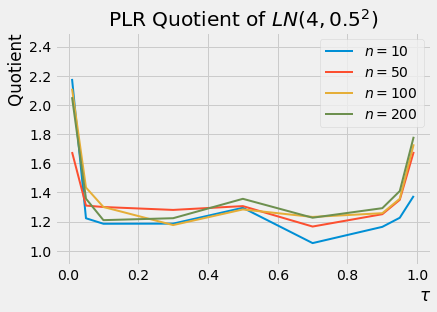

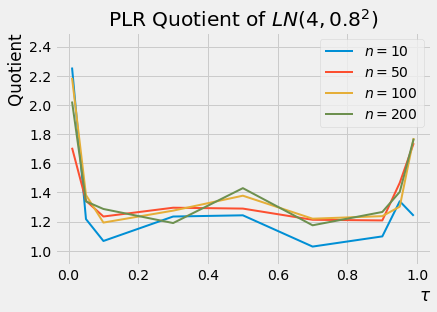

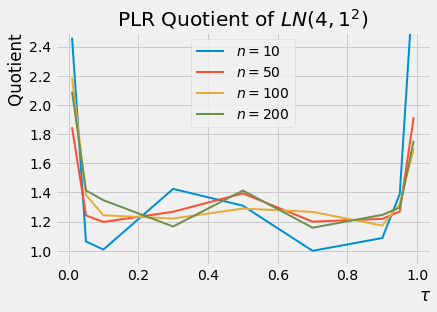

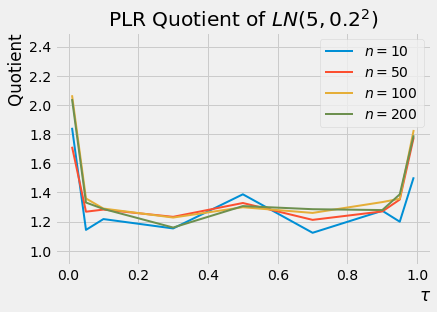

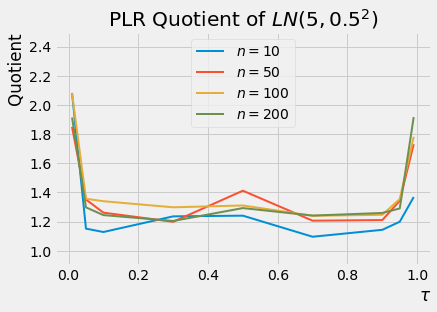

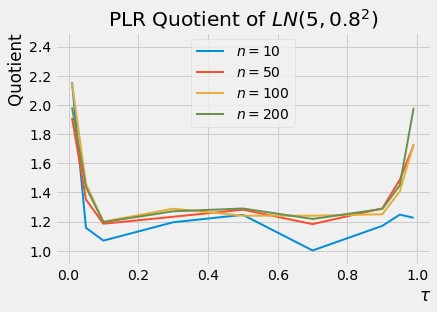

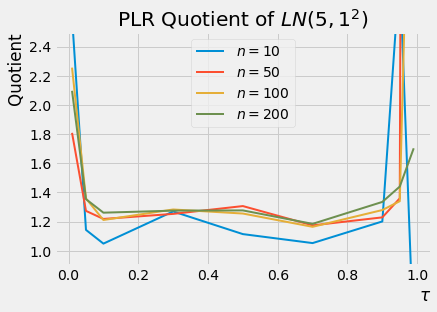

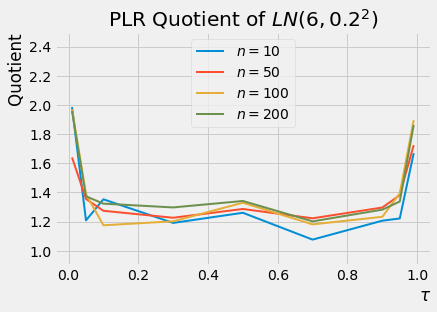

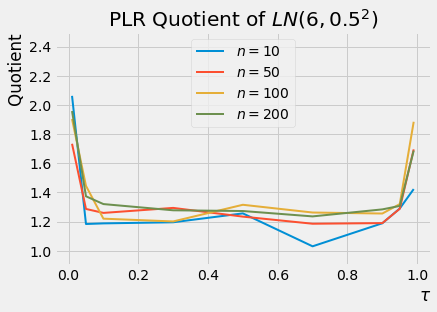

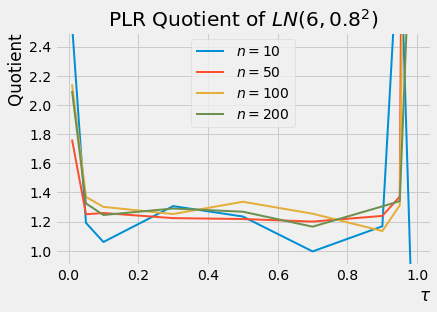

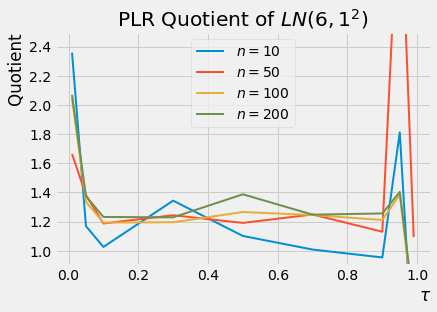

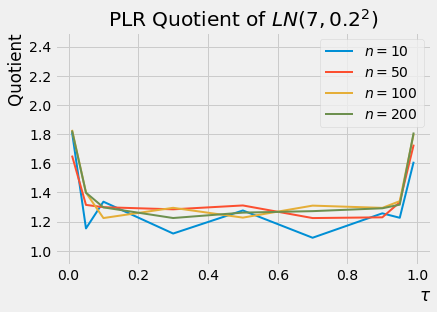

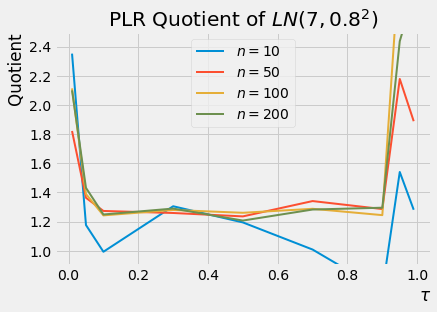

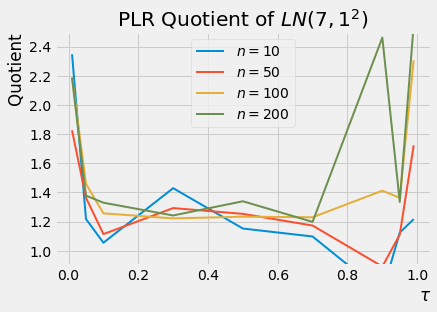

In [6]:
def plr_log(mu_index, sigma_index):
    plr_quo_10 = np.zeros(len(target_surface))
    plr_quo_50 = np.zeros(len(target_surface))
    plr_quo_100 = np.zeros(len(target_surface))
    plr_quo_200 = np.zeros(len(target_surface))

    for i, t in enumerate(target_surface):
        plr_par_10 = data_log[mu_index][sigma_index][0][i][0][1]
        plr_non_10 = data_log[mu_index][sigma_index][0][i][1][1]
        plr_quo_10[i] = plr_non_10/plr_par_10
    
        plr_par_50 = data_log[mu_index][sigma_index][1][i][0][1]
        plr_non_50 = data_log[mu_index][sigma_index][1][i][1][1]
        plr_quo_50[i] = plr_non_50/plr_par_50
    
        plr_par_100 = data_log[mu_index][sigma_index][2][i][0][1]
        plr_non_100 = data_log[mu_index][sigma_index][2][i][1][1]
        plr_quo_100[i] = plr_non_100/plr_par_100

        plr_par_200 = data_log[mu_index][sigma_index][3][i][0][1]
        plr_non_200 = data_log[mu_index][sigma_index][3][i][1][1]
        plr_quo_200[i] = plr_non_200/plr_par_200

    plt.plot(target_surface, plr_quo_10, lw=2)
    plt.plot(target_surface, plr_quo_50, lw=2)
    plt.plot(target_surface, plr_quo_100, lw=2)
    plt.plot(target_surface, plr_quo_200, lw=2)
    plt.ylim([0.9, 2.5])
    plt.legend(["$n = 10$", "$n = 50$", "$n = 100$", "$n = 200$"])
    plt.title(f"PLR Quotient of $LN({mus[mu_index]}, {sigmas[sigma_index]}^2)$")
    plt.xlabel("$\\tau$", loc="right")
    plt.ylabel("Quotient", loc="top")
    plt.show()

for i in range(4):
    for j in range(4):
        plr_log(i, j)

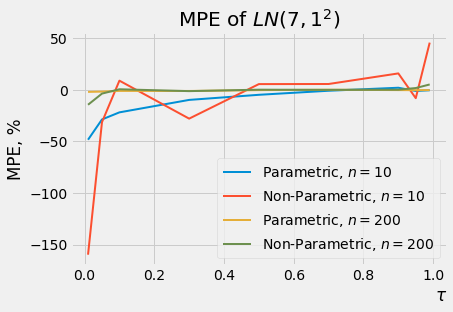

In [7]:
def mpe_log(mu_index, sigma_index):
    target_surface = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
    mpe_par_10 = np.zeros(len(target_surface))
    mpe_non_10 = np.zeros(len(target_surface))
    mpe_par_200 = np.zeros(len(target_surface))
    mpe_non_200 = np.zeros(len(target_surface))

    for i, t in enumerate(target_surface):
        mpe_par_10[i] = data_log[mu_index][sigma_index][0][i][0][2]
        mpe_non_10[i] = data_log[mu_index][sigma_index][0][i][1][2]
        mpe_par_200[i] = data_log[mu_index][sigma_index][3][i][0][2]
        mpe_non_200[i] = data_log[mu_index][sigma_index][3][i][1][2]

    plt.plot(target_surface, mpe_par_10, lw=2)
    plt.plot(target_surface, mpe_non_10, lw=2)
    plt.plot(target_surface, mpe_par_200, lw=2)
    plt.plot(target_surface, mpe_non_200, lw=2)
    plt.legend(["Parametric, $n = 10$", "Non-Parametric, $n = 10$", "Parametric, $n = 200$", "Non-Parametric, $n = 200$"])
    plt.title(f"MPE of $LN({mus[mu_index]}, {sigmas[sigma_index]}^2)$")
    plt.xlabel("$\\tau$", loc="right")
    plt.ylabel("MPE, %")
    plt.show()
mpe_log(3, 3)
mpe_log(0, 2)